In [33]:
import pandas as pd
A = pd.read_csv("C:\\Users\\Shrutika\\Desktop\\etl hive\\DS_py\\50_Startups.csv")

In [34]:
A[["RND","PROFIT"]][0:10]

,RND,PROFIT
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94
5,131876.90,156991.12
6,134615.46,156122.51
7,130298.13,155752.60
8,120542.52,152211.77
9,123334.88,149759.96


In [35]:
A.corr()

,RND,PROFIT
RND,1.0000,0.9729
PROFIT,0.9729,1.0000


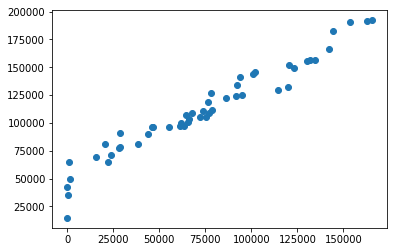

In [36]:
import matplotlib.pyplot as plt
plt.scatter(A.RND,A.PROFIT)
plt.show()

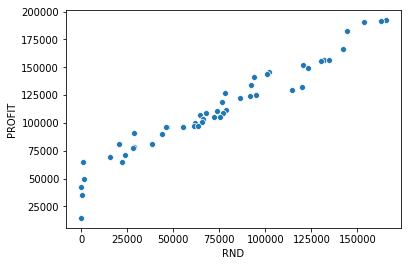

In [37]:
import seaborn as sb
sb.scatterplot(A.RND,A.PROFIT)

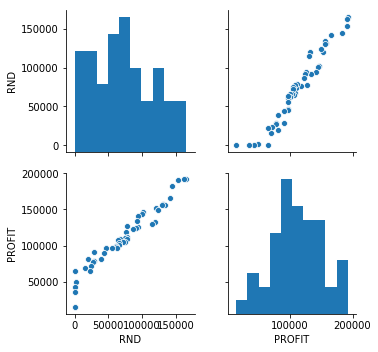

In [38]:
sb.pairplot(A)

In [39]:
X = A[["RND"]]
Y = A[["PROFIT"]]
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

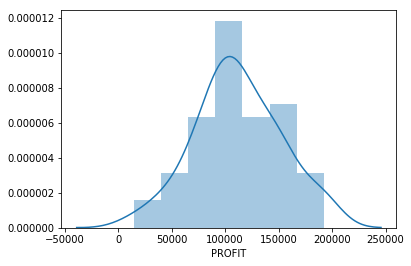

In [40]:
sb.distplot(A.PROFIT)

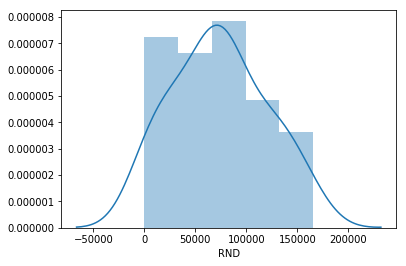

In [41]:
sb.distplot(A.RND)

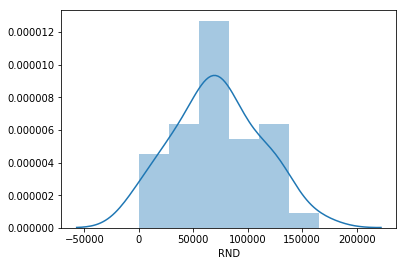

In [42]:
sb.distplot(xtrain.RND)

In [43]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)
ytest["predicted_vals"] = pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
ytest

,PROFIT,predicted_vals
43,69758.98,63637.418034
2,191050.39,176637.407569
1,191792.06,184138.357461
47,42559.73,50934.786942
44,65200.33,69103.273668
46,49490.75,52012.440371
3,182901.99,169207.803697
12,141585.52,127830.011428
4,166187.94,167352.209113
24,108552.04,114050.914779


In [45]:
ytest["Residuals"] = ytest.PROFIT-ytest.predicted_vals

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(ytest.PROFIT,ytest.predicted_vals)

In [47]:
print("Mean absolute error in model is %.2f"%MAE)

Mean absolute error in model is 7710.08


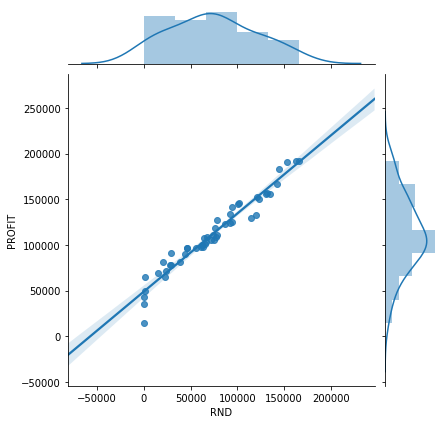

In [48]:
import seaborn as sb
sb.jointplot(x='RND', y='PROFIT',data=A,kind='reg')